In [41]:
#  Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston   # Load the Boston Housing Data Set from sklearn.datasets and print it
bos = load_boston()

In [3]:
# Importing the Boston Housing Dataset
bos_data = pd.DataFrame(bos.data)
bos_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Tranform the data set into a DataFrame 
#boston.data we want 
# boston.feature names = the column name of the data 
#boston.target = Our target variable or price of houses

#bos_x = pd.DataFrame(bos.data, columns = bos.feature_names )

#bos_y = pd.DataFrame(bos.target)
#bos_y.head(3)

In [5]:
# Adding feature names to dataframe 
bos_data.columns = bos.feature_names

# Adding the target variable to dataframe 
bos_data['price'] = bos.target
bos_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# check for misiing values
bos_data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [9]:
# see rows with misiing values 

bos_data[bos_data.isnull().any(axis = 1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price


In [10]:
bos_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# finding out the correlation between the featutre
corr = bos_data.corr()
corr.shape

(14, 14)

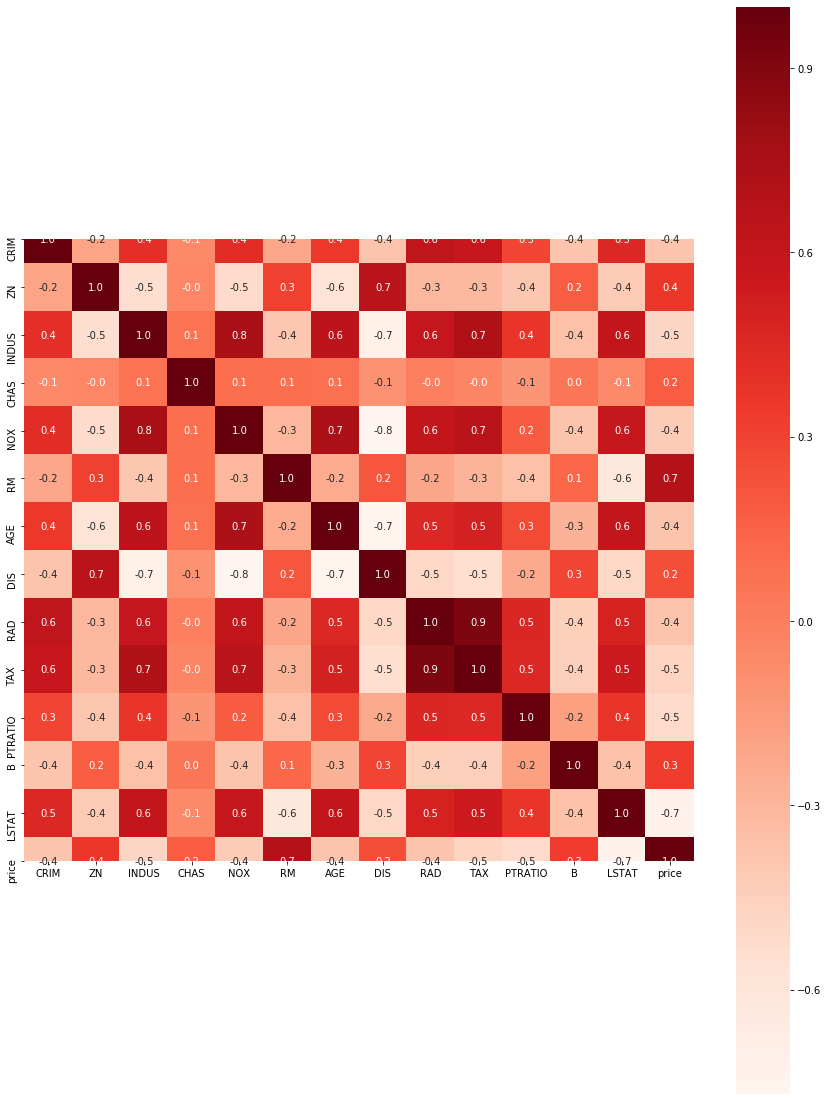

In [30]:
# Plotting the heatmap of correlation between features
plt.figure(figsize = (15,20))
sns.heatmap(corr,square= True ,fmt='.1f', annot=True,annot_kws={'size':10},cmap='Reds')

In [31]:
#Splitting target variable and independent variables
X = bos_data.drop(['price'],axis = 1)
y = bos_data['price']

In [32]:
# Splitting to training and testing data 
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state = 4)

# Linear Regression

Training the model

In [ ]:
# Impport library for linear regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
reg = LinearRegression ()

#Train our model with the training data
reg.fit(X_train,y_train)

In [37]:
# intercept
reg.intercept_

36.35704137659499

Model Evaluation

In [38]:
# model prediction on train data 
y_pred = reg.predict(X_train)

In [44]:
from sklearn import metrics
print('R squared : ', metrics.r2_score(y_train,y_pred))
print('Adjusted R Squared : ',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(y_train,y_pred))
print('MSE: ',metrics.mean_squared_error(y_train,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R squared :  0.7465991966746854
Adjusted R Squared :  0.736910342429894
MAE:  3.0898610949711247
MSE:  19.07368870346903
RMSE:  4.367343437774162


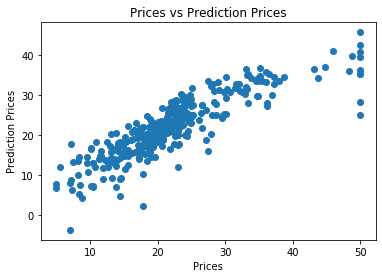

In [49]:
# Visualizing the differance between actual price and predicted  values
plt.scatter(y_train, y_pred)
plt.xlabel('Prices')
plt.ylabel('Prediction Prices')
plt.title('Prices vs Prediction Prices')
plt.show()

In [52]:
# Model Evaluating for test data
y_prediction = reg.predict(X_test)



In [53]:
from sklearn import metrics
print('R squared : ', metrics.r2_score(y_test,y_prediction))
print('Adjusted R Squared : ',1-(1-metrics.r2_score(y_test,y_prediction))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(y_test,y_prediction))
print('MSE: ',metrics.mean_squared_error(y_test,y_prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

R squared :  0.7121818377409194
Adjusted R Squared :  0.6850685326005712
MAE:  3.859005592370744
MSE:  30.053993307124145
RMSE:  5.482152251362976


Here the model evalutions scores are almost matching with tha of train data.so the model is not overfitting